# D-shaped tokamak

$$ R = R_0 (1 + \epsilon\cos(\theta+\delta\sin\theta)) $$
$$ \phi = -\zeta $$
$$ Z = R_0 \kappa\epsilon\sin\theta $$

In [1]:
import dcss.geometry
import dcss.localEquilibrium
import dcss.toroidalField

import numpy as np
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass
import matplotlib.pyplot as plt

In [2]:
r0 = 1                    # major radius
epsilon = 0.1             # aspect ratio
kappa = 2                 # elongation
delta = 0.5               # triangularity
iota = 1

funR = lambda theta: r0 * (1 + epsilon * np.cos(theta+delta*np.sin(theta)))
funZ = lambda theta: r0 * kappa * epsilon *np.sin(theta) 

In [3]:
nfp = 1
sampleNumsTheta, sampleNumsZeta = 5, 1
deltaTheta = 2*np.pi / (2*sampleNumsTheta+1)
deltaZeta = 2*np.pi / nfp / (2*sampleNumsZeta+1)
sampleTheta, sampleZeta = np.arange(2*sampleNumsTheta+1)*deltaTheta, np.arange(2*sampleNumsZeta+1)*deltaZeta
gridSampleZeta, gridSampleTheta = np.meshgrid(sampleZeta, sampleTheta) 
sampleR = funR(gridSampleTheta)
sampleZ = funZ(gridSampleTheta)

fieldR = dcss.toroidalField.fftToroidalField(sampleR, nfp=nfp) 
fieldZ = dcss.toroidalField.fftToroidalField(sampleZ, nfp=nfp) 

surfTokamak = dcss.geometry.Surface_cylindricalAngle(fieldR, fieldZ) 

In [4]:
def getAveG():
    from scipy.integrate import quad
    def getG(theta):
        return 1 / np.power(1+epsilon*np.cos(theta+delta*np.sin(theta)),2)
    return quad(getG, 0, 2*np.pi)[0] / np.pi / 2
aveG = getAveG()

In [5]:
surfaceProblem = dcss.localEquilibrium.SurfaceField(surfTokamak, iota=iota)

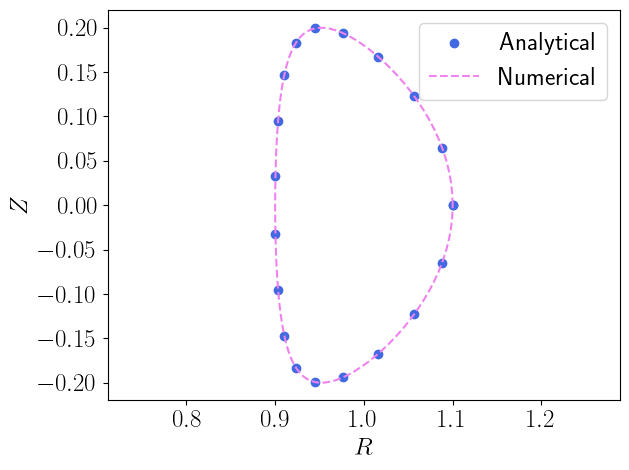

In [6]:
fig, ax = plt.subplots()
ax.scatter(funR(np.linspace(0, 2*np.pi, 20)), funZ(np.linspace(0, 2*np.pi, 20)), c = "royalblue", label="Analytical")
ax.plot(
    surfaceProblem.surf.r.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    surfaceProblem.surf.z.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "Numerical"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$R$", fontsize=18)
ax.set_ylabel(r"$Z$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
_ = plt.axis("equal")
fig.tight_layout()

$$ \sqrt{g} = (1+\epsilon\cos(\theta+\delta\sin\theta))^2 $$

In [7]:
surfaceProblem.solveJacobian()

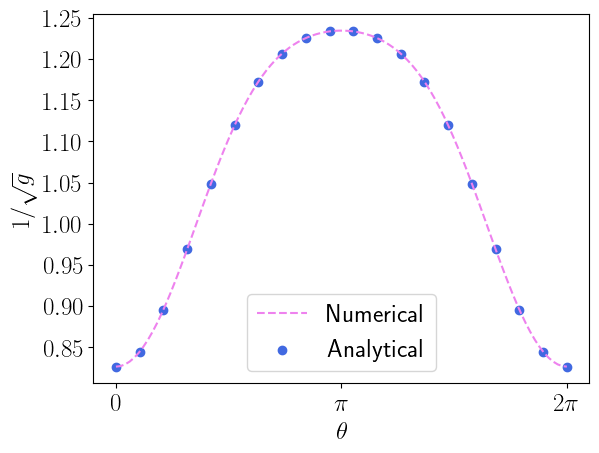

In [8]:
fig, ax = plt.subplots() 
ax.plot(
    np.linspace(0,2*np.pi,100), surfaceProblem.Jacobian.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten()*aveG, 
    c = "violet", 
    ls = "--", 
    label = "Numerical"
)
ax.scatter(
    np.linspace(0,2*np.pi,20), 
    1/np.power(1+epsilon*np.cos(np.linspace(0,2*np.pi,20)+delta*np.sin(np.linspace(0,2*np.pi,20))),2), 
    c = "royalblue", 
    label = "Analytical"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
ax.set_ylabel(r"$1/\sqrt{g}$", fontsize=18)
ax.set_xticks(np.linspace(0, 2*np.pi, 3))
ax.set_xticklabels(["$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)